# Module 01: Model Development 

## Import Necessary Libraries and Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import category_encoders as ce

## Import Data set

In [3]:
warnings.filterwarnings('ignore')
data = "heart-disease.csv"
df = pd.read_csv(data, header=None)
col_names = ['age',	'sex'	,'cp'	,'trestbps'	,'chol'	,'fbs',	'restecg'	,'thalach'	,'exang'	,'oldpeak'	,'slope'	,'ca'	,'thal',	'target']
df.columns = col_names
X = df.drop(['target', 'restecg', 'sex', 'chol', 'fbs', 'trestbps','slope','exang'], axis=1)
y = df['target']

## DTC, RFC, LRC, KNNC

In [4]:
# Split data (retained for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create pipelines with preprocessing and different models
classifiers = {
    "DecisionTree": DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0),
    "RandomForest": RandomForestClassifier(random_state=0),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=0),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

for model_name, model in classifiers.items():
    pipeline = Pipeline([
        ('encoder', ce.OrdinalEncoder(cols=['age', 'cp', 'thalach', 'oldpeak', 'ca', 'thal'])),
        ('classifier', model)
    ])

    # 5-fold stratified cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

    print(f"\nCross-Validation Results for {model_name}:")
    print(f"Fold Accuracies: {[f'{score:.4f}' for score in cv_scores]}")
    print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
    print(f"Standard Deviation: {np.std(cv_scores):.4f}")

    # Final evaluation on test set
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f'\nTest Set Accuracy for {model_name}: {accuracy_score(y_test, y_pred):.4f}')



Cross-Validation Results for DecisionTree:
Fold Accuracies: ['0.8780', '0.8537', '0.7561', '0.7500', '0.7750']
Mean CV Accuracy: 0.8026
Standard Deviation: 0.0529

Test Set Accuracy for DecisionTree: 0.8020

Cross-Validation Results for RandomForest:
Fold Accuracies: ['0.7805', '0.9024', '0.6829', '0.7500', '0.8250']
Mean CV Accuracy: 0.7882
Standard Deviation: 0.0735

Test Set Accuracy for RandomForest: 0.8218

Cross-Validation Results for LogisticRegression:
Fold Accuracies: ['0.8049', '0.7805', '0.8049', '0.7500', '0.8250']
Mean CV Accuracy: 0.7930
Standard Deviation: 0.0257

Test Set Accuracy for LogisticRegression: 0.7822

Cross-Validation Results for KNN:
Fold Accuracies: ['0.6341', '0.6098', '0.5610', '0.6000', '0.6000']
Mean CV Accuracy: 0.6010
Standard Deviation: 0.0236

Test Set Accuracy for KNN: 0.6436


## XGBC

In [7]:
# Define parameters for XGBClassifier
params = {
    'objective':'binary:logistic',
    'max_depth': 4,
    'alpha': 10,
    'learning_rate': 1.0,
    'n_estimators':100
}

# Instantiate the classifier
xgb_clf = XGBClassifier(**params)

# Split data into training and testing sets (optional, but can be used for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Perform k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-Validation Results:")
print(f"Fold Accuracies: {[f'{score:.4f}' for score in cv_scores]}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

# Final evaluation on test set
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
print('\nTest Set Accuracy: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


Cross-Validation Results:
Fold Accuracies: ['0.7805', '0.7561', '0.8537', '0.7750', '0.7750']
Mean CV Accuracy: 0.7880
Standard Deviation: 0.0338

Test Set Accuracy: 0.8400


## Comparison of Model Accuracies

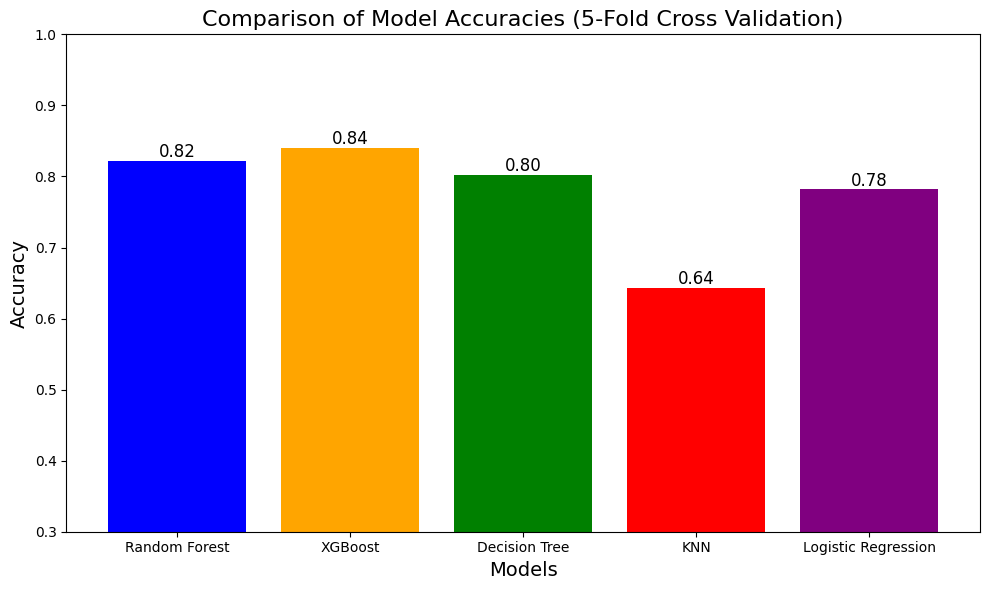

In [8]:
import matplotlib.pyplot as plt

# Final accuracies for each model (replace with actual results from your code execution)
final_accuracies = {
    'Random Forest': 0.8218,
    'XGBoost': 0.8400,
    'Decision Tree': 0.802,
    'KNN': 0.6436,
    'Logistic Regression': 0.7822
}

# Data for plotting
models = list(final_accuracies.keys())
accuracies = list(final_accuracies.values())

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])

# Add titles and labels
plt.title('Comparison of Model Accuracies (5-Fold Cross Validation)', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.3, 1.0)  # Set y-axis limits for better visualization

# Add accuracy values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f'{acc:.2f}', ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


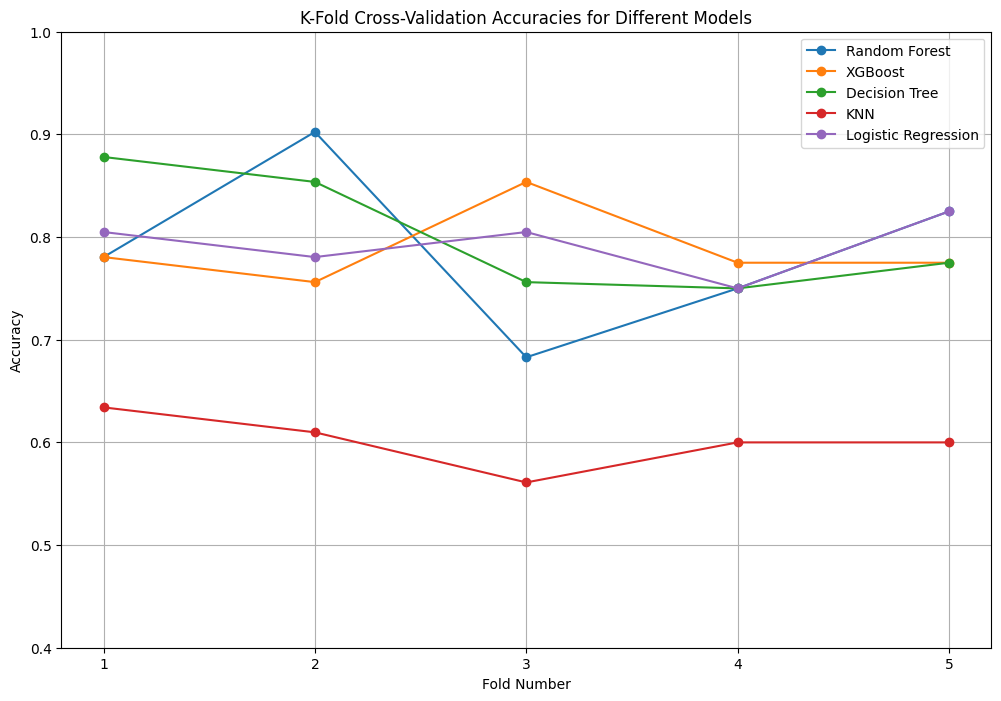

In [7]:
import matplotlib.pyplot as plt

# Example k-fold accuracies for each model
kfold_accuracies = {
    'Random Forest': [0.7805, 0.9024, 0.6829, 0.7500, 0.8250],
    'XGBoost': [0.7805, 0.7561, 0.8537, 0.7750, 0.7750],
    'Decision Tree': [0.8780, 0.8537, 0.7561, 0.7500, 0.7750],
    'KNN': [0.6341, 0.6098, 0.5610, 0.6000, 0.6000],
    'Logistic Regression': [0.8049, 0.7805, 0.8049, 0.7500, 0.8250]    
}

folds = range(1, 6)

plt.figure(figsize=(12, 8))
for model in kfold_accuracies:
    plt.plot(folds, kfold_accuracies[model], marker='o', label=model)
plt.title('K-Fold Cross-Validation Accuracies for Different Models')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(folds)
plt.ylim(0.4, 1.0)
plt.legend()
plt.grid(True)
plt.show()


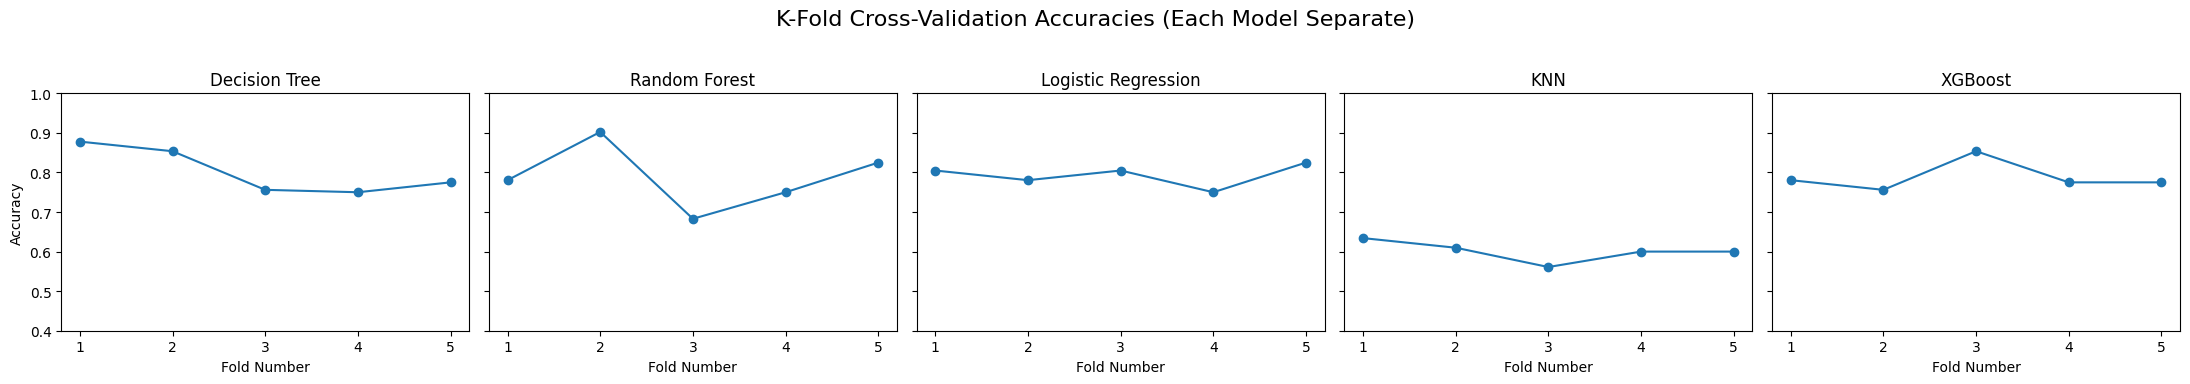

In [2]:
import matplotlib.pyplot as plt

# K-fold accuracies for each model (from your results)
kfold_accuracies = {
    'Decision Tree': [0.8780, 0.8537, 0.7561, 0.7500, 0.7750],
    'Random Forest': [0.7805, 0.9024, 0.6829, 0.7500, 0.8250],
    'Logistic Regression': [0.8049, 0.7805, 0.8049, 0.7500, 0.8250],
    'KNN': [0.6341, 0.6098, 0.5610, 0.6000, 0.6000],
    'XGBoost': [0.7805, 0.7561, 0.8537, 0.7750, 0.7750]
}

folds = range(1, 6)
model_names = list(kfold_accuracies.keys())

# Set up subplots: one row, five columns (one for each model)
fig, axes = plt.subplots(1, len(model_names), figsize=(22, 4), sharey=True)

for idx, model in enumerate(model_names):
    axes[idx].plot(folds, kfold_accuracies[model], marker='o', color='tab:blue')
    axes[idx].set_title(model)
    axes[idx].set_xlabel('Fold Number')
    axes[idx].set_xticks(folds)
    axes[idx].set_ylim(0.4, 1.0)
    if idx == 0:
        axes[idx].set_ylabel('Accuracy')

plt.suptitle('K-Fold Cross-Validation Accuracies (Each Model Separate)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


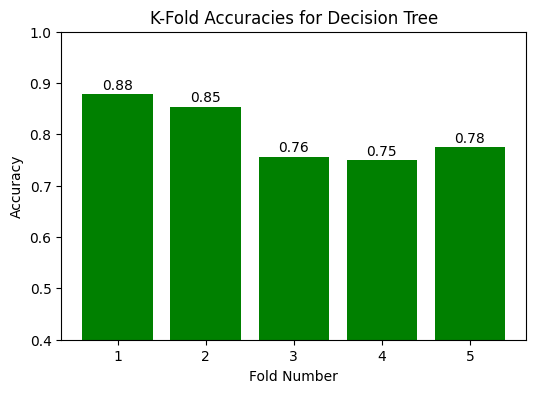

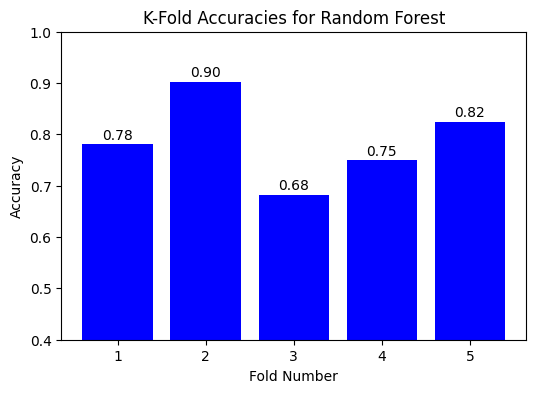

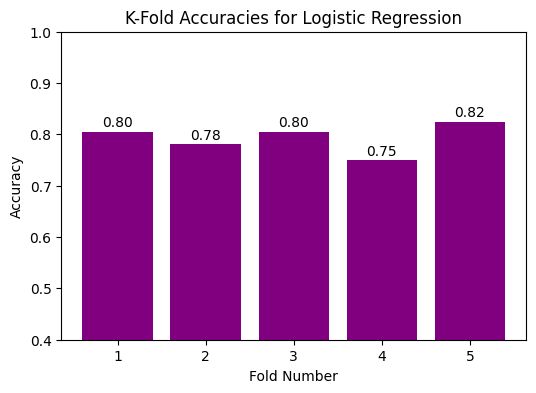

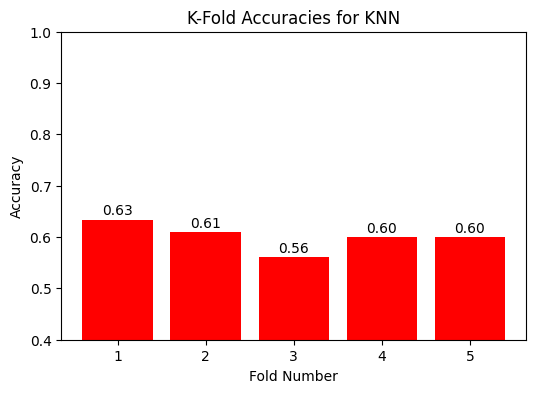

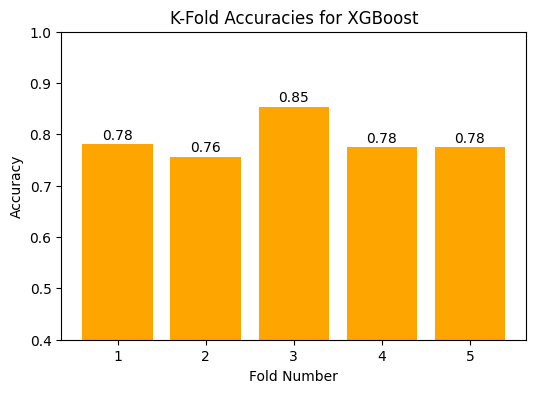

In [6]:
import matplotlib.pyplot as plt

# K-fold accuracies for each model
kfold_accuracies = {
    'Decision Tree': [0.8780, 0.8537, 0.7561, 0.7500, 0.7750],
    'Random Forest': [0.7805, 0.9024, 0.6829, 0.7500, 0.8250],
    'Logistic Regression': [0.8049, 0.7805, 0.8049, 0.7500, 0.8250],
    'KNN': [0.6341, 0.6098, 0.5610, 0.6000, 0.6000],
    'XGBoost': [0.7805, 0.7561, 0.8537, 0.7750, 0.7750]
}

folds = range(1, 6)

# Colors for each model
colors = {
    'Decision Tree': 'green',
    'Random Forest': 'blue',
    'Logistic Regression': 'purple',
    'KNN': 'red',
    'XGBoost': 'orange'
}

# Plot separate bar charts for each model
for model, accuracies in kfold_accuracies.items():
    plt.figure(figsize=(6, 4))
    plt.bar(folds, accuracies, color=colors[model])
    plt.title(f'K-Fold Accuracies for {model}')
    plt.xlabel('Fold Number')
    plt.ylabel('Accuracy')
    plt.ylim(0.4, 1.0)
    plt.xticks(folds)
    for i, acc in enumerate(accuracies, 1):
        plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center')
    plt.show()


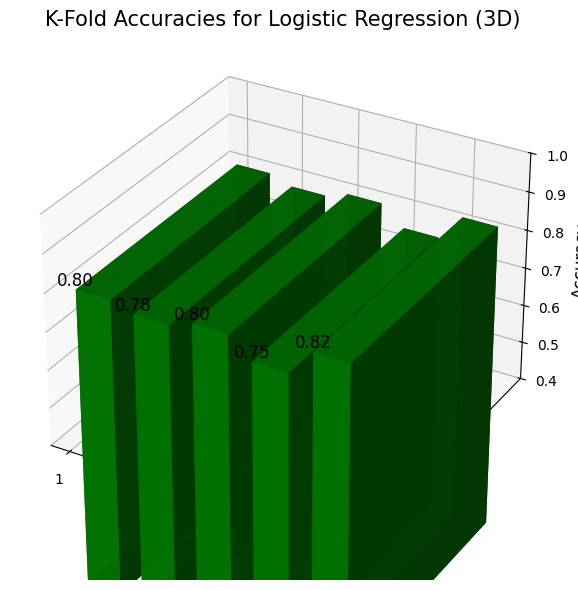

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Example: Logistic Regression
accuracies = [0.80, 0.78, 0.80, 0.75, 0.82]  # Replace with each model's fold accuracies
folds = np.arange(1, 6)
color = 'green'  # Use a different color for each model, e.g., 'blue', 'orange', etc.

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 3D bar parameters
x = folds
y = np.zeros_like(folds)  # All bars at y=0 for a single series
z = np.zeros_like(folds)
dx = np.ones_like(folds) * 0.6
dy = np.ones_like(folds) * 0.6
dz = accuracies

ax.bar3d(x, y, z, dx, dy, dz, color=color, alpha=0.9)
ax.set_xlabel('Fold Number', fontsize=12)
ax.set_ylabel('')
ax.set_zlabel('Accuracy', fontsize=12)
ax.set_xticks(folds)
ax.set_yticks([])
ax.set_title('K-Fold Accuracies for Logistic Regression (3D)', fontsize=15)
ax.set_zlim(0.4, 1.0)

# Add value labels on top of bars
for i in range(len(folds)):
    ax.text(x[i], y[i], dz[i] + 0.01, f'{dz[i]:.2f}', color='black', ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('logistic_regression_3d.png')  # Save as a separate image
plt.show()


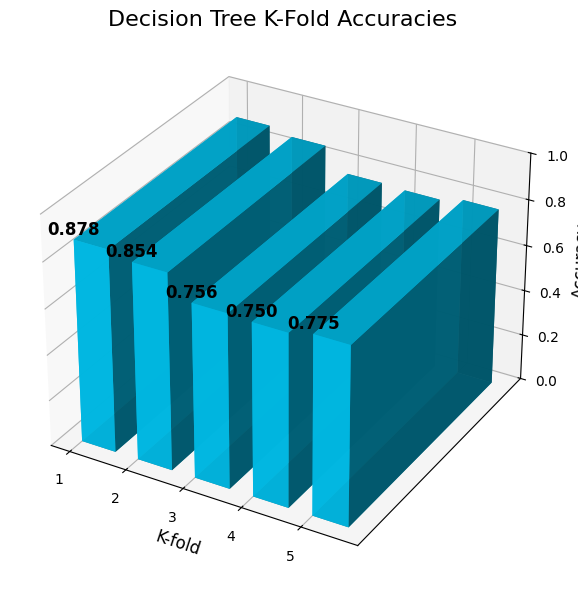

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Example: Decision Tree (replace with each model's values)
model_name = 'Decision Tree'
accuracies = [0.8780, 0.8537, 0.7561, 0.7500, 0.7750]  # Your k-fold accuracies
folds = np.arange(1, 6)
color = '#00cfff'  # Pick a distinct color for each model

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

# Bar positions and dimensions
x = folds
y = np.zeros_like(folds)
z = np.zeros_like(folds)
dx = np.ones_like(folds) * 0.6
dy = np.ones_like(folds) * 0.6
dz = accuracies

# 3D bars
ax.bar3d(x, y, z, dx, dy, dz, color=color, alpha=0.9, shade=True)

# Labels and title
ax.set_xlabel('K-fold', fontsize=12)
ax.set_ylabel('')
ax.set_zlabel('Accuracy', fontsize=12)
ax.set_xticks(folds)
ax.set_yticks([])
ax.set_title(f'{model_name} K-Fold Accuracies', fontsize=16)
ax.set_zlim(0.0, 1.0)

# Annotate each bar with its value
for i in range(len(folds)):
    ax.text(x[i], y[i], dz[i] + 0.02, f'{dz[i]:.3f}', color='black', ha='center', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()
# plt.savefig(f"{model_name.replace(' ', '_').lower()}_3d_kfold.png")  # Uncomment to save as image
